In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine)

In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(measurement.date)).first()[0]
print(most_recent_date)

2017-08-23


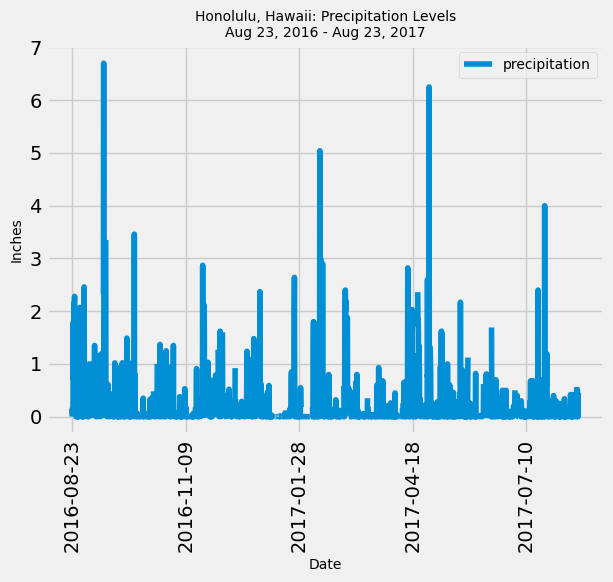

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date

# Calculate the date one year from the last date in data set.
one_year_ago = dt.date(2017, 8, 23)-dt.timedelta(days=365)
one_year_ago = dt.date(one_year_ago.year, one_year_ago.month, one_year_ago.day)
#print("Date one year from the last date:\n", one_year_ago)

# Perform a query to retrieve the data and precipitation scores
query = session.query(measurement.date, measurement.prcp).filter(measurement.date >= one_year_ago).order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
query_df = pd.DataFrame(query, columns = ['Date', 'Precipitation'])

# Sort the dataframe by date
ordered_df = query_df.sort_values('Date').set_index(query_df['Date'])

# Use Pandas Plotting with Matplotlib to plot the data
ordered_df.plot(x='Date', y='Precipitation')
plt.title("Honolulu, Hawaii: Precipitation Levels\nAug 23, 2016 - Aug 23, 2017", size=10)
plt.xlabel("Date",  size = 10)
plt.ylabel("Inches", size = 10)
plt.xticks(rotation=90)
plt.legend(["precipitation"], prop={'size': 10}, loc='upper right')
#plt.savefig("Output_Files/prcp_chart.png")
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
ordered_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
stations_count = session.query(station.id).count()
stations_count

9

In [18]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stations_list = session.query(measurement.station, func.count(measurement.station))\
                .group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

print("Station \tCount")
print("--------------------")
for station in stations_list:
    print(station)

Station 	Count
--------------------
('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [14]:
# Which station has the most rows?
print(f"Station with the most rows:\n {stations_list[0][0]}, {stations_list[0][1]}")

Station with the most rows:
 USC00519281, 2772


In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station_temps = session.query(func.min(measurement.tobs),
                                     func.max(measurement.tobs),
                                     func.avg(measurement.tobs)).\
                                    filter(measurement.station == stations_list[0][0]).all()
print(f"Station '{stations_list[0][0]}' Temps:\nLowest Temperature: {active_station_temps[0][0]}, \nHighest Temperature: {active_station_temps[0][1]}, \nAverage Temperature: {active_station_temps[0][2]}")

Station 'USC00519281' Temps:
Lowest Temperature: 54.0, 
Highest Temperature: 85.0, 
Average Temperature: 71.66378066378067


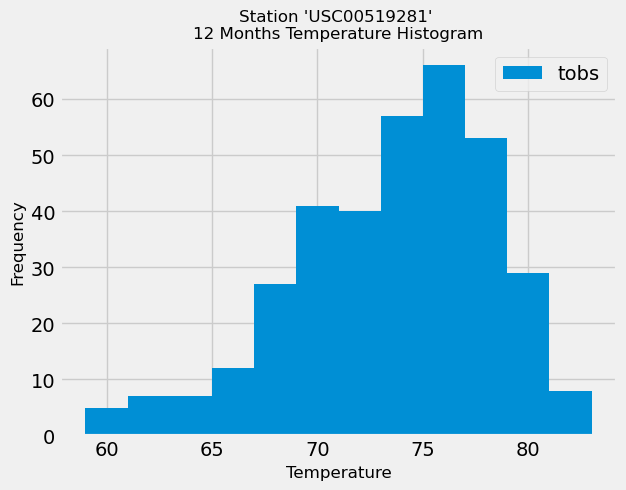

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query = session.query(measurement.tobs).filter(measurement.station == stations_list[0][0])\
                .filter(measurement.date >= one_year_ago).all()

#Plot results
query_df = pd.DataFrame(query,columns=['TOBS'])

query_df.plot.hist(bins=12)
plt.title(f"Station '{stations_list[0][0]}' \n12 Months Temperature Histogram", size=12)
plt.xlabel("Temperature", size=12)
plt.ylabel("Frequency", size=12)
plt.legend(["tobs"])

plt.show()


# Close Session

In [17]:
# Close Session
session.close()